In [1]:
import pickle
import numpy as np
import pathlib
import json

In [3]:
dir_path = pathlib.Path('/Users/yang/PycharmProjects/SpeakerVerification-pytorch/Lime/Data/LoResNet8/timit/soft/epoch_12_var_50/epoch_12')
test_lst = list(dir_path.glob('*test*bin'))

test_utt_file = test_lst[0]
test_utt_ids_file = '/Users/yang/PycharmProjects/SpeakerVerification-pytorch/Lime/Data/LoResNet8/timit/soft/epoch_12_var_50/epoch_12/inputs.timit_test.1.json'
with open(test_utt_ids_file, 'r') as f:
    test_utt_ids = json.load(f)


In [4]:
test_utt_ids[:1]

[[['mcmb0-si1898'], ['mcmb0-sx8']]]

In [5]:
test_utt = {}

with open(test_utt_file, 'rb') as f:
    sets = pickle.load(f)
    for idx,(label, grad_a, grad_b, data_a, data_b) in enumerate(sets):
        a_uid = test_utt_ids[idx][0][0]
        b_uid = test_utt_ids[idx][1][0]
        test_utt[a_uid] = (data_a, grad_a)
        test_utt[b_uid] = (data_b, grad_b)

In [6]:
test_utt['mcmb0-sx8'][0].shape

(241, 161)

In [7]:
import matplotlib.pyplot as plt
import matplotlib

241
(161, 241)


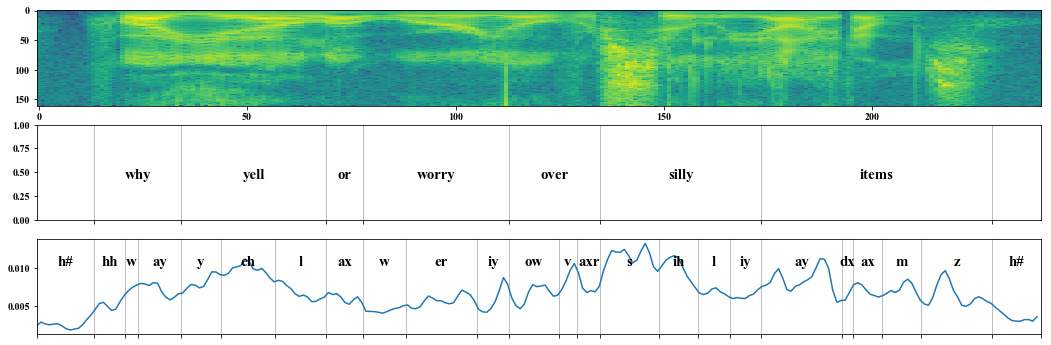

In [21]:
# utt_id = 'mcmb0-si1898'
# break_points = np.array([0, 2381, 3174, 3592, 4119, 4760, 7185, 7603, 9000, 10610, 11400, 11560, 13320, 14440, 14840, 15400, 16840, 18280, 19080, 19840, 20600, 22182, 23400, 26800])
# phonemes = ['h#', 'y', 'v', 'gcl', 'g', 'aa', 'tcl', 'n', 'ow', 'bcl', 'b', 'ih', 'z', 'n', 'ax', 's', 'ah', 'pcl', 'p', 'hh', 'ih', 'r', 'h#']
# wrd_points = np.array([2381, 3592, 7603, 10610, 16840, 19840, 23400])
# wrd = ["you've", 'got', 'no', 'business', 'up', 'here']

utt_id = 'mcmb0-sx8'
break_points = np.array([0, 2200, 3400, 3893, 5556, 7060, 9148, 11112, 12520,
 14161, 16919, 18130, 20040, 20760, 21640, 23880, 25400, 26600, 27822, 30913,
 31320, 32459, 33960, 36680, 38560])
phonemes = ['h#','hh', 'w', 'ay', 'y', 'eh', 'l', 'ax', 'w', 'er', 'iy', 'ow', 'v', 
            'axr', 's', 'ih', 'l', 'iy', 'ay', 'dx', 'ax', 'm', 'z', 'h#']
wrd_points = np.array([2200, 5556, 11112, 12520, 18130, 21640, 27822, 36680])
wrd = ['why', 'yell', 'or', 'worry', 'over', 'silly', 'items']


audio_len = len(test_utt[utt_id][0])
print(audio_len)

plt.figure(figsize=(15, 5))
plt.rc('font', family='Times New Roman')
ax = plt.subplot(3,1,1)
ax.imshow(test_utt[utt_id][0].transpose(), aspect='auto')

ax = plt.subplot(3,1,2)

locs = matplotlib.ticker.FixedLocator(wrd_points)
ax.xaxis.set_major_locator(locs)
ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.grid(True, which='major')
ax.set_xlim(0, audio_len*160) 

wrd_points_mid = []
for i in range(1, len(wrd_points)):
    wrd_points_mid.append((wrd_points[i]+wrd_points[i-1])/2.)
ys = np.ones(len(wrd_points_mid)) * 0.4
for i, (x,y) in enumerate(zip(wrd_points_mid, ys)):
    plt.text(x,y, wrd[i], ha='center', va='bottom', fontsize=15)
    
    
ax = plt.subplot(3,1,3)
utt_grad_relu = np.where(test_utt[utt_id][1].transpose()>0, test_utt[utt_id][1].transpose(), 0)
utt_x = np.arange(0, audio_len) * 160
print(utt_grad_relu.shape)

ax.plot(utt_x, utt_grad_relu.sum(axis=0))
ax.set_xlim(0, audio_len*160) 

locs = matplotlib.ticker.FixedLocator(break_points)
ax.xaxis.set_major_locator(locs)
ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.grid(True, which='major')
ax.set_xlim(0, audio_len*160) 

break_points_mid = []
for i in range(1, len(break_points)):
    break_points_mid.append((break_points[i]+break_points[i-1])/2.)
    
ys = np.ones(len(break_points_mid)) * 0.010

for i, (x,y) in enumerate(zip(break_points_mid, ys)):
    plt.text(x,y, phonemes[i], ha='center', va='bottom', fontsize=15)

plt.subplots_adjust(left=0.05, right=0.98, top=0.95, bottom=0.05) 
plt.show()

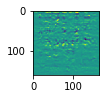

In [ ]:
plt.subplot(3,1,3)
plt.imshow(test_utt['mcmb0-si1898'][1].transpose())

In [10]:
def read_phn(file):
    idx = []
    phns = []
    with open(file, 'r') as f:
        for l in f.readlines():
            start, end, p = l.split()
            if int(start) not in idx:
                idx.append(int(start))
            if int(end) not in idx:
                idx.append(int(end))
            phns.append(p)
    return idx, phns
        

In [11]:
read_phn('/home/yangwenhao/storage/dataset/timit/test/dr5/mcmb0/sx8.wrd')

FileNotFoundError: [Errno 2] No such file or directory: '/home/yangwenhao/storage/dataset/timit/test/dr5/mcmb0/sx8.wrd'